# Visualising Loans Awarded by Kiva

Kiva is an online lending platform that allows people to lend money via the Internet to low-income entrepreneurs and students in 77 countries.
In this project I was interested in visualising any variations between five countries in the amount of loans awarded by Kiva utilising a subset of data found on Kaggle. I was also interested in determining whether males or females tend to receive larger loans (the dataset did not include data for people who do not identify as male or female).

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick

I will first explore the dataset.
Each row in the dataset represents a loan that Kiva awarded to a particular project. The `loan_amount` column shows the amount (in U.S. dollars) awarded to the project. The `activity` column has the category type that the project falls under. The `country` column is the country where the project is located. The `gender` column represents the gender of the person who applied for the loan. 

In [2]:
kiva = pd.read_csv('kiva_data.csv')
kiva.head()

,loan_amount,activity,country,gender
0,625,Food Production/Sales,Pakistan,female
1,250,Food Production/Sales,Pakistan,female
2,400,Food Production/Sales,Pakistan,female
3,400,Food Production/Sales,Pakistan,female
4,500,Food Production/Sales,Pakistan,female


In [3]:
countries = kiva.groupby('country').loan_amount.count().reset_index()
countries.sort_values(by = 'loan_amount', ascending = False)

,country,loan_amount
4,Philippines,50273
2,Kenya,7100
1,El Salvador,6172
3,Pakistan,1786
0,Cambodia,168


In [4]:
countries_sum = kiva.groupby('country').loan_amount.sum().reset_index()
countries_sum.sort_values(by = 'loan_amount', ascending = False)

,country,loan_amount
4,Philippines,16494200
1,El Salvador,3528725
2,Kenya,2778975
3,Pakistan,775950
0,Cambodia,108375


In [10]:
gender_count = kiva.groupby('gender').loan_amount.count().reset_index()
gender_count.sort_values(by = 'loan_amount', ascending = False)

,gender,loan_amount
0,female,61632
1,male,3867


In [5]:
activity = kiva.groupby('activity').loan_amount.sum().reset_index()
activity.sort_values(by = 'loan_amount', ascending = False)

,activity,loan_amount
2,General Store,17487850
1,Food Production/Sales,4939725
0,Farming,1258650


The dataset includes information about loans awarded in five countries and in three categories.
The vast majority of records in this dataset come from Philippines (50,723), whereas Cambodia has only 168 records. These differences mean that any conclusions about Cambodia will be less reliable than conclusions about Philippines and other countries that have thousands of records. Philippines also have the largest sum of loans, which is to be expected given that it has so many records.

The majority (94 oer cent) of records are for loans awarded to females.

The most successful 'activity' in terms of the amount of money awarded was 'General Store. 'General Store' received 12.5 millions of dollars more than the second most successful category.

## Kiva loans by country

In this section I explore loan amounts awarded in different countries.

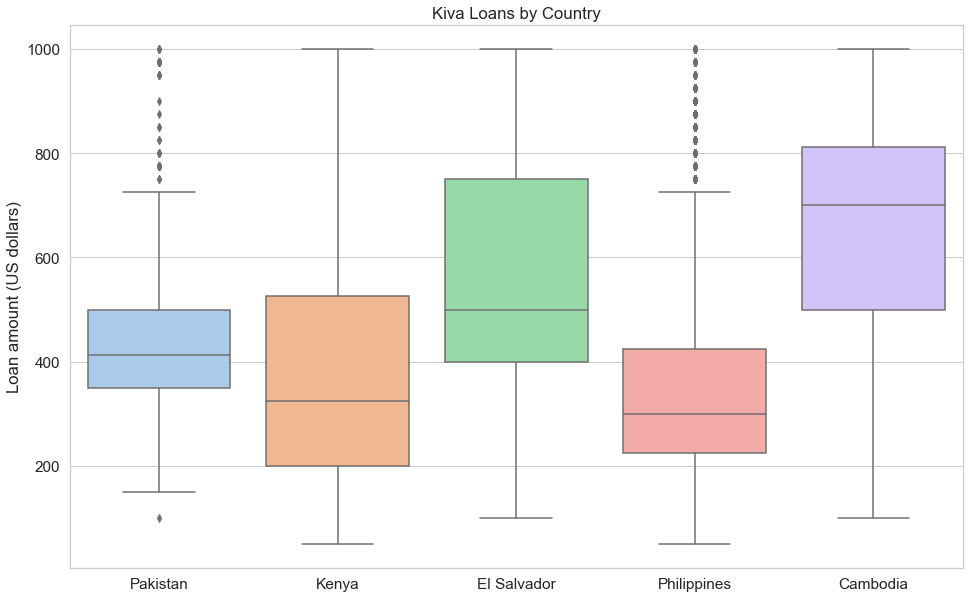

In [6]:
sns.set(font_scale = 1.4)
sns.set_palette("pastel")
sns.set_style("whitegrid")

plt.figure(figsize=(16, 10))
ax = sns.boxplot(data = kiva, x = 'country', y = 'loan_amount');
ax.set(title = 'Kiva Loans by Country', ylabel='Loan amount (US dollars)', xlabel='');

A few observations:
* Philippines had the smallest loans out of all five countries, whereas Cambodia had the largest loans. This discrepancy might be the result of the different number of records for each country. It is likely that Cambodia was only recently introduced to the platform and was promoted more than Philippines. These differences also might reflect the scope of projects or the economic situation in these two countries: for example, Philippines might be requesting loans for smaller projects and/or the purchasing power of US dollars might be higher than in Cambodia.
* The overall distribution of loan amount in El Salvador was similar to Cambodia, but El Salvador's median loan amount was considerably smaller than that of Cambodia. Despite this, it was still higher than other three countries: Parisktan, Kenya and Philippines.
* Pakistan had the smallest distribution of loan amount (except for a few outliers), but fared better than Kenya and Philippines in terms of the median loan amount.

### Kiva loans by country & activity

I was also interested in exploring whether some types of 'activity' tend to receive higher loans and whether these differ between countries. I decided to visualise median loans in each of these categories.

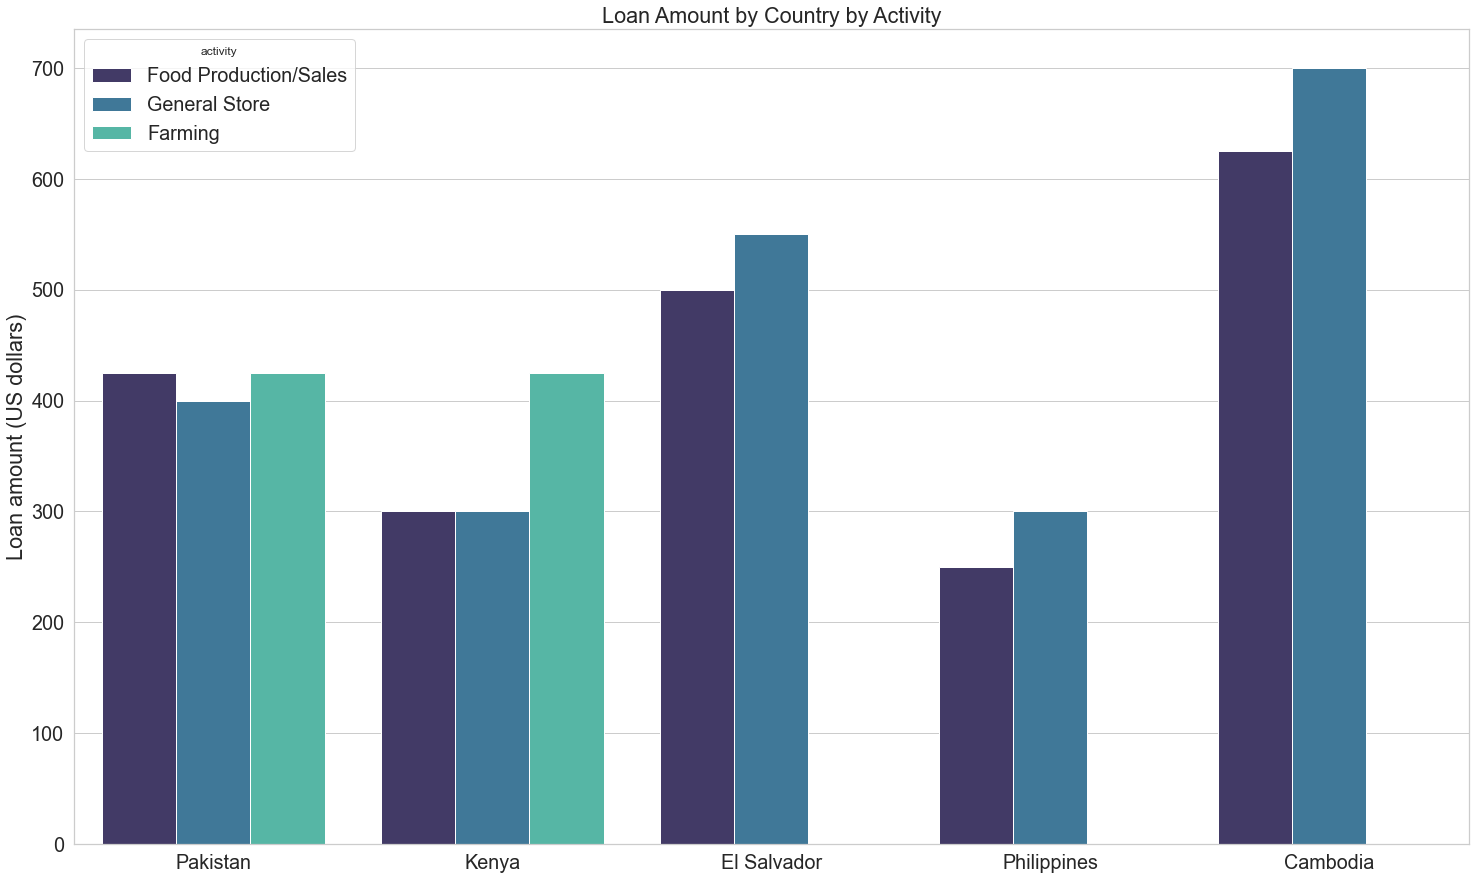

In [7]:
sns.set(font_scale = 1.8)
sns.set_palette('mako', 3)
sns.set_style('whitegrid')

f, ax = plt.subplots(figsize=(25, 15))
sns.barplot(data = kiva, x = 'country', y = 'loan_amount', hue = 'activity', ci = None, estimator = np.median, saturation = 0.8)
ax.set(title = 'Loan Amount by Country by Activity', ylabel='Loan amount (US dollars)', xlabel='');

* The first thing that stands out is that only two countries received loans for farming. In the absence of other information, it is unknown whether other countries do not request loans for farming or whether they are not awarded those loans.
* Pakistan was awarded similar loans for all three activities, which was not the case for any other country.
* The median loan amount for farming was the same in both Pakistan and Kenya.
* Median loan amounts in El Salvador were the second largest after Cambodia, which is consistent with our previous observations.
* Median loan amounts in Philippines were the lowest out of all countries.
* El Salvador, Philippines and Cambodia all had similar pattern in that general store activitity tend to receive larger loans than food productions/sales.

## Kiva loans by gender

In the final section of this analysis, I will explore the distribution of loans by gender in each of the countries included in the dataset. I will create a violin plot to viualise the distribution of loans and create a pivot table to make it easier to identify any numerical differences in median loan amounts awarded in each country.

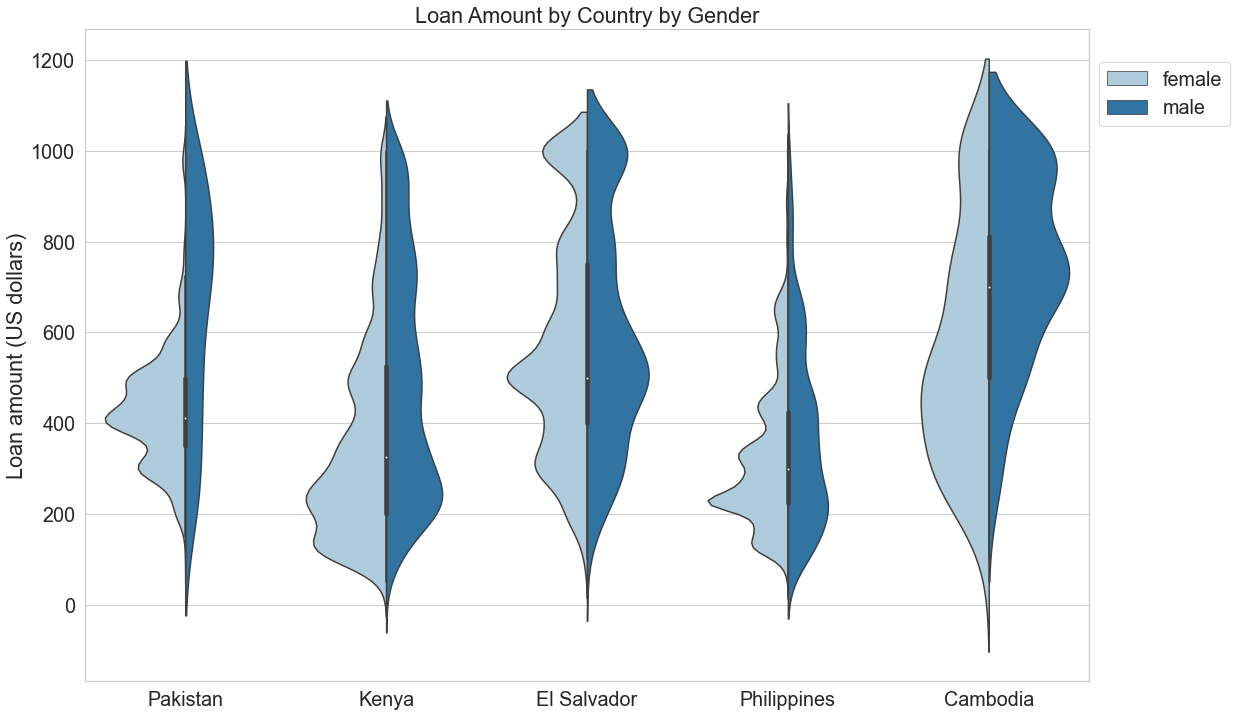

In [8]:
sns.set_palette('Paired')

plt.figure(figsize=(18, 12))
g = sns.violinplot(data=kiva, x='country', y='loan_amount', hue = 'gender', split = True)
g.set(title = 'Loan Amount by Country by Gender', ylabel='Loan amount (US dollars)', xlabel='')
g.legend(loc='center left', bbox_to_anchor=(1.0, 0.9), ncol=1);

In [9]:
gender_pivot = kiva.pivot_table(values = 'loan_amount', index = 'country', columns = 'gender', aggfunc = np.median)

gender_pivot.columns = ['female', 'male']
gender_pivot['difference'] = ((gender_pivot.female - gender_pivot.male)/(gender_pivot.female + gender_pivot.male)) * 100
gender_pivot.sort_values(['difference'])

,female,male,difference
country,,,
Pakistan,400,700,-27.272727
Kenya,300,475,-22.580645
Cambodia,500,750,-20.000000
Philippines,300,350,-7.692308
El Salvador,500,550,-4.761905


* In all five countries females tend to receive smaller loans than males, however, the magnitude of these differences varies considerably.
* In El Salvador there is the least disparity in median loan amount between females and males (difference of 4.8 per cent), although, as we can see on the plot, larger loans were awarded only to males.
* In Philippines the disparity was larger than in El Salvador, but still noticeably smaller than in all other countries at 7.7 per cent.
* The rest of the countries have visually noticeable differences. Cambodia had a 20.0 per cent difference in median loan amount: males tend to receive loans between \\$700 to \\$1000, whereas females tend to receive loans around \\$500. Kenya had the difference of 22.6 per cent. Interestingly, the majority of males received loans of approximately the same value as females did, however, the fact that males almost exclusively tend to receive loans of \\$500 or more brings the median up for this group. Finally, Pakistan had the largest difference of 27.2 per cent. The median loan amout awarded to females in Pakistan was \\$400, whereas males tend to receive loans of around \\$700.

Importantly, since the dataset utilised for this analysis was published, Kiva might have already addressed gender disparities. Kiva now has a strong focus on supporting women in all 77 countries - they actively encourage website visitors to donate to women and have a page dedicated to gender equaliy (https://www.gender.kiva.org/).